In [48]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [49]:
features = pd.read_csv('CreacionDeFeatures/trainingSet.csv')
testing = pd.read_csv('CreacionDeFeatures/testingSet.csv')

labels = pd.read_csv('CreacionDeFeatures/Data/labels_training_set.csv')

In [50]:
labels.sum()

person    0566e9c16ec7ee77abe7a2fb3472836487ed62dedb2c4d...
label                                                   980
dtype: object

In [51]:
labels.count()

person    19414
label     19414
dtype: int64

In [52]:
balance = 19414/980

balance

19.81020408163265

In [53]:
features = features.set_index('person')

features.head()

,CantidadEventos,CantidadCompras,CantidadLeads,VentasHaceUnMes,LeadsHaceUnMes,VentasHaceDosMeses,LeadsHaceDosMeses,CantidadCheckouts,VentasMes1,VentasMes2,...,EntraronConTablet,CantidadAdHits,DiasDesdeUltimoAdHit,DiasDesdeUltimaBusqueda,CantidadDeColoresVistos,CantidadDiasDiferentesDeVisita,CantidadDeModelosVistos,EsDeBrazil,DiasDeActividadDeUsuario,DiasDesdeUltimoSearchHit
person,,,,,,,,,,,,,,,,,,,,,
0008ed71,6,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,1000.0,1000.0,3,1,3,1.0,1.0,1000.0
000c79fe,17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,3.0,1,1,1,1.0,1.0,3.0
001802e4,19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,5.0,1.0,1.0,2,1,2,1.0,1.0,1000.0
0019e639,471,2.0,0.0,1.0,0.0,1.0,0.0,15.0,0.0,1.0,...,0.0,29.0,10.0,10.0,14,14,26,1.0,115.0,10.0
001b0bf9,7,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1000.0,1000.0,2,1,1,0.0,1.0,1000.0


In [54]:
labels = labels.set_index('person')

labels.head()

,label
person,
0566e9c1,0
6ec7ee77,0
abe7a2fb,0
34728364,0
87ed62de,0


In [55]:
data = features.merge(labels, left_index=True, right_index=True)

data.head()

,CantidadEventos,CantidadCompras,CantidadLeads,VentasHaceUnMes,LeadsHaceUnMes,VentasHaceDosMeses,LeadsHaceDosMeses,CantidadCheckouts,VentasMes1,VentasMes2,...,CantidadAdHits,DiasDesdeUltimoAdHit,DiasDesdeUltimaBusqueda,CantidadDeColoresVistos,CantidadDiasDiferentesDeVisita,CantidadDeModelosVistos,EsDeBrazil,DiasDeActividadDeUsuario,DiasDesdeUltimoSearchHit,label
person,,,,,,,,,,,,,,,,,,,,,
0008ed71,6,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,1000.0,1000.0,3,1,3,1.0,1.0,1000.0,0
000c79fe,17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,3.0,1,1,1,1.0,1.0,3.0,0
001802e4,19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,1.0,1.0,2,1,2,1.0,1.0,1000.0,0
0019e639,471,2.0,0.0,1.0,0.0,1.0,0.0,15.0,0.0,1.0,...,29.0,10.0,10.0,14,14,26,1.0,115.0,10.0,0
001b0bf9,7,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,1000.0,1000.0,2,1,1,0.0,1.0,1000.0,0


In [56]:
features, labels = data.iloc[:,:-1],data.iloc[:,-1]

In [57]:
features.head()

,CantidadEventos,CantidadCompras,CantidadLeads,VentasHaceUnMes,LeadsHaceUnMes,VentasHaceDosMeses,LeadsHaceDosMeses,CantidadCheckouts,VentasMes1,VentasMes2,...,EntraronConTablet,CantidadAdHits,DiasDesdeUltimoAdHit,DiasDesdeUltimaBusqueda,CantidadDeColoresVistos,CantidadDiasDiferentesDeVisita,CantidadDeModelosVistos,EsDeBrazil,DiasDeActividadDeUsuario,DiasDesdeUltimoSearchHit
person,,,,,,,,,,,,,,,,,,,,,
0008ed71,6,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,1000.0,1000.0,3,1,3,1.0,1.0,1000.0
000c79fe,17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,3.0,1,1,1,1.0,1.0,3.0
001802e4,19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,5.0,1.0,1.0,2,1,2,1.0,1.0,1000.0
0019e639,471,2.0,0.0,1.0,0.0,1.0,0.0,15.0,0.0,1.0,...,0.0,29.0,10.0,10.0,14,14,26,1.0,115.0,10.0
001b0bf9,7,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1000.0,1000.0,2,1,1,0.0,1.0,1000.0


In [58]:
labels.head()

#Estan en el mismo orden

person
0008ed71    0
000c79fe    0
001802e4    0
0019e639    0
001b0bf9    0
Name: label, dtype: int64

In [59]:
data_dmatrix = xgb.DMatrix(data=features,label=labels)

In [60]:
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=123)

In [61]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.03,
                max_depth = 3, alpha = 4, gamma = 2, n_estimators = 200,
                min_child_weight = 35, subsample = 0.8, scale_pos_weight=balance)

In [62]:
xg_reg.fit(features_train,labels_train)

XGBClassifier(alpha=4, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=2, learning_rate=0.03, max_delta_step=0,
       max_depth=3, min_child_weight=35, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=19.81020408163265,
       seed=None, silent=True, subsample=0.8)

In [63]:
labels_preds = xg_reg.predict(features_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test, labels_preds)
accuracy

0.7778540772532189

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels_test, labels_preds)
# C0,0  True Negatives,  response 0, predicted 0
# C1,0  False Negatives, response 1, predicted 0
# C0,1  False Positives, response 0, predicted 1
# C1,1  True Positives,  response 1, predicted 1

array([[4281, 1246],
       [  48,  250]], dtype=int64)

In [66]:
labels_preds.sum()

1496

In [67]:
labels_test.sum()

298

In [68]:
labels_test.count()

5825

In [69]:
xg_class = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.03,
                max_depth = 3, alpha = 4, gamma = 2, n_estimators = 200,
                min_child_weight = 35, subsample = 0.8, scale_pos_weight=balance)

In [23]:
testing = testing.set_index('person')

In [24]:
xg_class.fit(features,labels)

XGBClassifier(alpha=4, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=2, learning_rate=0.03, max_delta_step=0,
       max_depth=3, min_child_weight=35, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=19.81020408163265,
       seed=None, silent=True, subsample=0.8)

In [25]:
labels_predicciones = xg_class.predict(testing)

In [26]:
labels_predicciones.sum()

5080

In [27]:
print(labels_predicciones)

[0 1 0 ... 1 1 0]


In [28]:
sample = pd.read_csv('CreacionDeFeatures/Data/trocafone_kaggle_submit_sample_all_0.csv')

In [29]:
sample = sample.set_index('person')

sample.head()

,label
person,
4886f805,0
0297fc1e,0
2d681dd8,0
cccea85e,0
4c8a8b93,0


In [30]:
sample = sample.sort_index()

sample.head()

,label
person,
00091926,0
00091a7a,0
000ba417,0
000e4d9e,0
000e619d,0


In [31]:
testing.head()

#Estan en el mismo orden

,CantidadEventos,CantidadCompras,CantidadLeads,VentasHaceUnMes,LeadsHaceUnMes,VentasHaceDosMeses,LeadsHaceDosMeses,CantidadCheckouts,VentasMes1,VentasMes2,...,EntraronConTablet,CantidadAdHits,DiasDesdeUltimoAdHit,DiasDesdeUltimaBusqueda,CantidadDeColoresVistos,CantidadDiasDiferentesDeVisita,CantidadDeModelosVistos,EsDeBrazil,DiasDeActividadDeUsuario,DiasDesdeUltimoSearchHit
person,,,,,,,,,,,,,,,,,,,,,
00091926,448,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,15.0,1.0,1000.0,20,22,36,1.0,29.0,1000.0
00091a7a,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,67.0,1000.0,3,1,3,1.0,1.0,1000.0
000ba417,206,1.0,0.0,1.0,0.0,1.0,0.0,6.0,0.0,0.0,...,0.0,1.0,15.0,1000.0,20,3,26,1.0,10.0,15.0
000e4d9e,411,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,19.0,10.0,1000.0,12,9,37,1.0,15.0,10.0
000e619d,68,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,6.0,14.0,14.0,9,4,23,1.0,4.0,16.0


In [32]:
sample['label'] = labels_predicciones

sample.head()

,label
person,
00091926,0
00091a7a,1
000ba417,0
000e4d9e,0
000e619d,0


In [33]:
sample.to_csv('predicciones.csv')

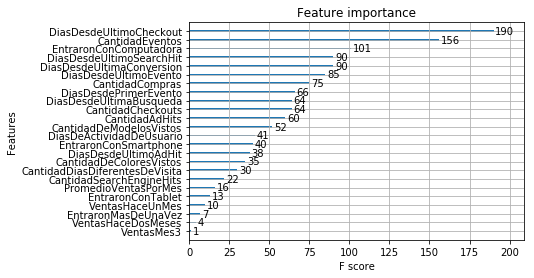

In [37]:
xgb.plot_importance(xg_class)